In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from vogn import VOGN
from models import SimpleConvNet
from datasets import Dataset
from utils import train_model
from utils import inference
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from torch.utils.data.dataloader import DataLoader

In [2]:

# Test wether GPUs are available
use_cuda =  torch.cuda.is_available()
print("Using Cuda: %s" % use_cuda)

# Set Random Seed
torch.manual_seed(42)



Using Cuda: True


In [3]:
# Load the dataset, 'mnist' or 'cifar10'
dataset = 'mnist'
data = Dataset(dataset)
trainloader = data.get_train_loader(batch_size=128)
testloader = data.get_train_loader(batch_size=128)
N = data.get_train_size() # Save the size of the train set
input_channels = 1
dims = 28

# Initilaize the model, criterion and optimizer
model = SimpleConvNet(input_channels=input_channels, dims=dims)
if use_cuda:
    model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = VOGN(model, train_set_size=N, prec_init=1e2, num_samples=10)
#optimizer = optim.Adam(model.parameters())
model, train_loss, train_accuracy, test_loss, test_accuracy = train_model(model, [trainloader, testloader], criterion,
                                                                          optimizer, num_epochs=2)


Epoch[0]:
Iteration[200]: Train Loss: 1.192190   Train Accuracy: 0.929667 
Iteration[400]: Train Loss: 0.707278   Train Accuracy: 0.959550 
## Epoch[0], Train Loss: 0.126106   &   Train Accuracy: 0.959783
## Epoch[0], Test Loss: 0.126104   &   Test Accuracy: 0.959783
Epoch[1]:
Iteration[200]: Train Loss: 0.155880   Train Accuracy: 0.967517 
Iteration[400]: Train Loss: 0.147060   Train Accuracy: 0.971783 
## Epoch[1], Train Loss: 0.089213   &   Train Accuracy: 0.971617
## Epoch[1], Test Loss: 0.089292   &   Test Accuracy: 0.971617


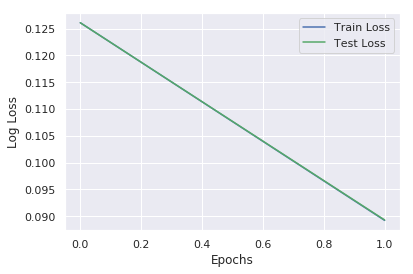

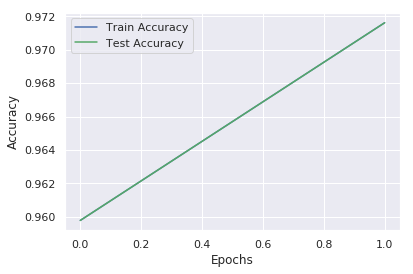

In [4]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(train_loss, 'b')
ax.plot(test_loss, 'g')
ax.legend(["Train Loss", "Test Loss"])
plt.ylabel("Log Loss")
plt.xlabel("Epochs")
plt.show()

fig, ax = plt.subplots()
ax.plot(train_accuracy, 'b')
ax.plot(test_accuracy, 'g')
ax.legend(["Train Accuracy", "Test Accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

Remarque : dans mu et precision on aura les gaussiennes a superposer

Reste a compute l inference.

predict = torch.zeros(2000,128)
for i, data in enumerate(testloader):
        outputs,pred,correct = inference(model, data)
        if i == 200:
            for k in range(2000):
                predict[k,:]=pred

outputs.shape,pred.shape

In [5]:
predict = torch.zeros(2000,128)
for i, data in enumerate(testloader):
        if i == 200:
            predictions = inference(model, data,optimizer,10)

In [6]:
ppp = torch.zeros(10,128)
for i in range(10):
    ppp[i,:]=torch.argmax(predictions.pop(),dim=1)

In [7]:
for i in range(128):
    print(torch.histc(ppp[:,i],bins=10))

tensor([8., 0., 0., 0., 0., 0., 0., 0., 0., 2.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.])
tensor(

In [8]:
a.shape

NameError: name 'a' is not defined

In [10]:
torch.cuda.is_available()

True

In [11]:
torch.cuda.device_count()


4